In [12]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
import gffutils

In [6]:
#for all genomes 
def create_table (path_to_df_dir, path_to_output) : 
    list_species = []
    for genome in os.scandir(path_to_df_dir) : 
        path_dir= os.path.join(path_to_df_dir,genome.name)
        df = pd.read_csv(os.path.join(path_dir,'df'))
        df_exons = pd.read_csv(os.path.join(path_dir,'df_exons'))
        df_introns = pd.read_csv(os.path.join(path_dir,'df_introns'))
        df_stats = pd.read_csv(os.path.join(path_dir,'df_stats'))
        specie = []
        specie.append(genome.name)
        genes_mean_length = np.mean(df_stats['length'])
        specie.append(genes_mean_length)
        nb_genes = len(df['gene'].unique())
        specie.append(nb_genes)        
        nb_trancripts = len(df['transcript'].unique())
        specie.append(nb_trancripts)        
        nb_exons = len(df_exons)
        specie.append(nb_exons) 
        exons_mean_length = np.mean(df_exons['length'])       
        specie.append(exons_mean_length)
        exon_ratio = np.mean(df_stats['ratio_exons'])        
        specie.append(exon_ratio) 
        nb_introns = len(df_introns)
        specie.append(nb_introns)  
        intron_mean_length = np.mean(df_introns['length']) 
        specie.append(intron_mean_length)             
        intron_ratio = np.mean(df_stats['ratio_introns'])
        specie.append(intron_ratio)
        list_species.append(specie)
    table_species = pd.DataFrame(list_species, 
                                 columns=('genome_id','genes_mean_length','nb_genes','nb_transcripts','nb_exons','exons_mean_length','exon_ratio','nb_introns','introns_mean_length','intron_ratio'))
    table_species = table_species.sort_values(by='genome_id')
    table_species.to_csv(path_to_output)
    return table_species

df=create_table('/home/collot/stage/collot/output_dataframes', '/home/collot/stage/collot/table_species.csv')
print(df)


           genome_id  genes_mean_length  nb_genes  nb_transcripts  nb_exons  \
2   GCF_000001405.40       59033.034256     23295           89100    236626   
1    GCF_000164805.1       41794.334183     20004           30638    194204   
0    GCF_000165445.2       53891.736750     20509           51633    179157   
3    GCF_000181295.1       49881.267563     19558           30386    191748   
5    GCF_000951035.1       57209.445754     20103           35756    197433   
4    GCF_000951045.1       56736.680219     20267           35562    203347   
6    GCF_000955945.1       59925.895896     20614           55326    216206   
7    GCF_000956065.1       61083.381596     21017           57146    210389   
8    GCF_000956105.1       48496.640520     19378           26940    186361   
9    GCF_001604975.1       52930.644031     21544           47739    212028   
10   GCF_001698545.2       50687.277999     21644           44069    214629   
11   GCF_002776525.5       54651.673309     21528   

['GCF_000165445.2', 'GCF_000164805.1', 'GCF_000001405.40', 'GCF_000181295.1', 'GCF_000951045.1', 'GCF_000951035.1', 'GCF_000955945.1', 'GCF_000956065.1', 'GCF_000956105.1', 'GCF_001604975.1', 'GCF_001698545.2', 'GCF_002776525.5', 'GCF_003255815.1', 'GCF_003339765.1', 'GCF_006542625.1', 'GCF_007565055.1', 'GCF_008728515.1', 'GCF_009761245.1', 'GCF_009828535.3', 'GCF_009764315.1', 'GCF_011100555.1', 'GCF_015252025.1', 'GCF_016699345.2', 'GCF_020740605.2', 'GCF_024542745.1', 'GCF_027406575.1', 'GCF_028858775.2', 'GCF_028878055.3', 'GCF_028885625.2', 'GCF_028885655.2', 'GCF_029281585.2', 'GCF_029289425.2', 'GCF_030222135.1', 'GCF_037993035.1', 'GCF_041146395.1']


<Axes: >

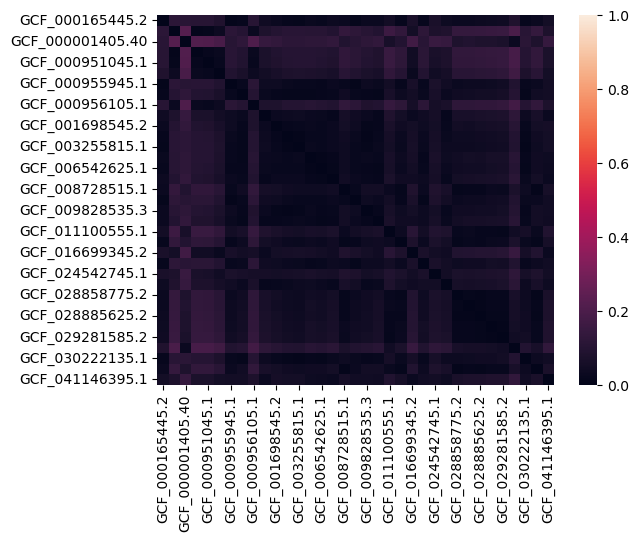

In [17]:
def create_df (path_to_df_dir) : 
    genome_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir) : 
        genome_list.append(genome.name)
    
    for i in range(len(genome_list)): 
        path_dir= os.path.join(path_to_df_dir,genome_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genome_list)):
            path_dir= os.path.join(path_to_df_dir,genome_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['ratio_introns'], df_stats_j['ratio_introns'],nan_policy='omit')
            row.append(ks_score.statistic)
        df.append(row)
    df_ks = pd.DataFrame(df, columns=genome_list, index=genome_list)
    print(genome_list)
    return df_ks

df_ks_i = create_df('/home/collot/stage/collot/output_dataframes')
sns.heatmap(df_ks_i, vmax=1)

<Axes: >

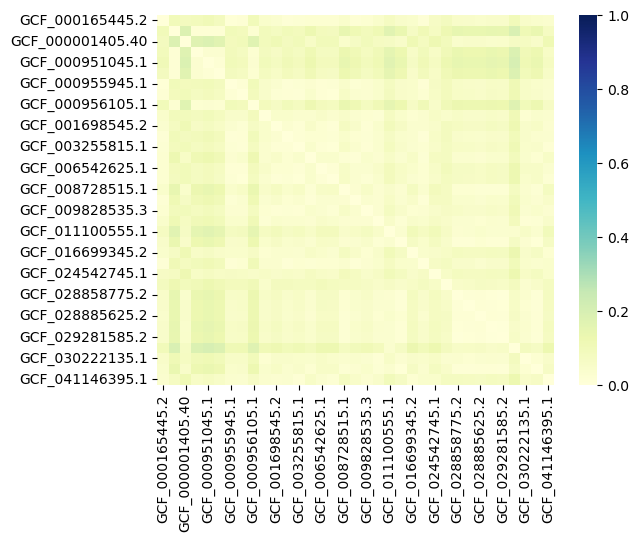

In [16]:
def create_df (path_to_df_dir) : 
    genome_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir) : 
        genome_list.append(genome.name)
    
    for i in range(len(genome_list)): 
        path_dir= os.path.join(path_to_df_dir,genome_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genome_list)):
            path_dir= os.path.join(path_to_df_dir,genome_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['ratio_exons'], df_stats_j['ratio_exons'],nan_policy='omit')
            row.append(ks_score.statistic)
        df.append(row)
    df_ks = pd.DataFrame(df, columns=genome_list, index=genome_list)
    return df_ks

df_ks_e = create_df('/home/collot/stage/collot/output_dataframes')
sns.heatmap(df_ks_e, vmax=1, cmap="YlGnBu")

<Axes: >

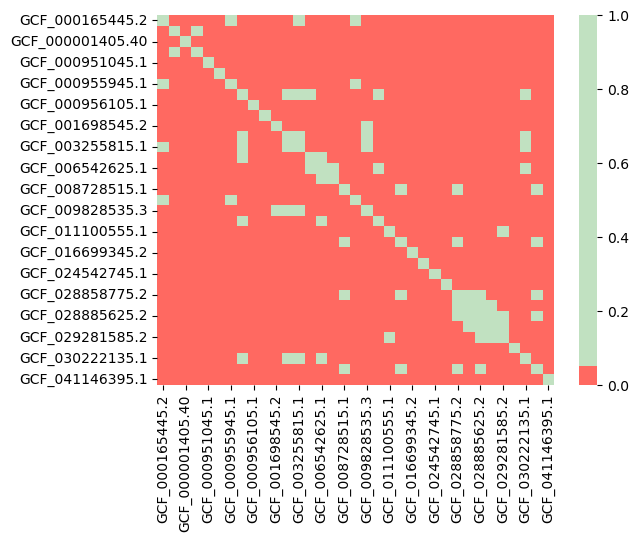

In [14]:
def create_df (path_to_df_dir) : 
    genome_list = []
    df=[]
    for genome in os.scandir(path_to_df_dir) : 
        genome_list.append(genome.name)
    
    for i in range(len(genome_list)): 
        path_dir= os.path.join(path_to_df_dir,genome_list[i])
        df_stats_i = pd.read_csv(os.path.join(path_dir,'df_stats'))
        row = []
        for j in range(len(genome_list)):
            path_dir= os.path.join(path_to_df_dir,genome_list[j])
            df_stats_j = pd.read_csv(os.path.join(path_dir,'df_stats'))
            ks_score = scipy.stats.ks_2samp(df_stats_i['ratio_introns'], df_stats_j['ratio_introns'],nan_policy='omit')
            row.append(ks_score.pvalue)
        df.append(row)
    df_ks = pd.DataFrame(df, columns=genome_list, index=genome_list)
    return df_ks

df_ks = create_df('/home/collot/stage/collot/output_dataframes')
sns.heatmap(df_ks, cmap=['#FF6961','#C1E1C1'], center=.05)